In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV de vuelos
df_vuelos = pd.read_csv('C:/Users/crist/OneDrive/Documentos/Septimo Cuatrimestre/Examen Primer Parcial/flights.csv')
df_vuelos.head()

# Mostrar el dataframe de vuelos
print(df_vuelos)

        Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
0       2013      9          16          1      DL            15304   
1       2013      9          23          1      WN            14122   
2       2013      9           7          6      AS            14747   
3       2013      7          22          1      OO            13930   
4       2013      5          16          4      DL            13931   
...      ...    ...         ...        ...     ...              ...   
271935  2013      9          20          5      VX            13204   
271936  2013      4          19          5      FL            10397   
271937  2013     10          26          6      WN            12191   
271938  2013      5           7          2      HA            13830   
271939  2013      6          11          2      UA            14771   

                               OriginAirportName     OriginCity OriginState  \
0                            Tampa International          Tampa     

In [10]:
# Verificación de valores faltantes en el conjunto de datos
valores_faltantes = df_vuelos.isnull().sum()

# Imputación de valores faltantes en 'DepDel15' en función de 'DepDelay'
df_vuelos['DepDel15'] = df_vuelos['DepDelay'].apply(lambda x: 1 if x >= 15 else 0)

# Comprobación de valores atípicos en DepDelay y ArrDelay usando estadísticas descriptivas
estadisticas_retrasos = df_vuelos[['DepDelay', 'ArrDelay']].describe()

# Filtrar filas donde DepDelay o ArrDelay sea mayor a 600 minutos (valores atípicos)
df_limpio = df_vuelos[(df_vuelos['DepDelay'] <= 600) & (df_vuelos['ArrDelay'] <= 600)]

# Verificar las nuevas estadísticas después de eliminar valores atípicos
estadisticas_retrasos_limpios = df_limpio[['DepDelay', 'ArrDelay']].describe()

# Agrupar por aerolínea para comparar el rendimiento en retraso de llegada
retraso_llegada_aerolinea = df_limpio.groupby('Carrier')['ArrDelay'].mean().sort_values(ascending=False)

# Agrupar por aeropuerto de origen para encontrar el aeropuerto con mayor retraso en comparacion al mas puntual
retraso_salida_tardia_aeropuerto = df_vuelos.groupby('OriginAirportName')['DepDel15'].count().sort_values(ascending=False).head(10)
Puntual_salida_aeropuerto = df_limpio[df_limpio['DepDelay'] <= 0].groupby('OriginAirportName')['DepDelay'].count().sort_values(ascending=False).head(10)

# Agrupar por día de la semana para ver si hay diferencias en los retrasos de llegada
retraso_llegada_dia_semana = df_limpio.groupby('DayOfWeek')['ArrDelay'].mean().sort_values()

# Agrupar por aeropuerto de origen para encontrar el aeropuerto con mayor retraso promedio de salida
retraso_salida_aeropuerto = df_limpio.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False).head(10)
retraso_llegada_aeropuerto = df_limpio.groupby('OriginAirportName')['ArrDelay'].mean().sort_values(ascending=False).head(10)

Retrasos de salida por aeropuerto:
 OriginAirportName
Hartsfield-Jackson Atlanta International    15119
Los Angeles International                   11753
Chicago O'Hare International                12965
Phoenix Sky Harbor International             9068
San Francisco International                  8453
Dallas/Fort Worth International             10437
Charlotte Douglas International              7697
Denver International                         9680
George Bush Intercontinental/Houston         7538
Name: DepDel15, dtype: int64
Vuelos puntuales por aeropuerto:
 OriginAirportName
Hartsfield-Jackson Atlanta International    8622
Los Angeles International                   6891
Chicago O'Hare International                6833
Phoenix Sky Harbor International            5231
San Francisco International                 4900
Dallas/Fort Worth International             4797
Charlotte Douglas International             4763
Denver International                        4383
George Bush Intercontin

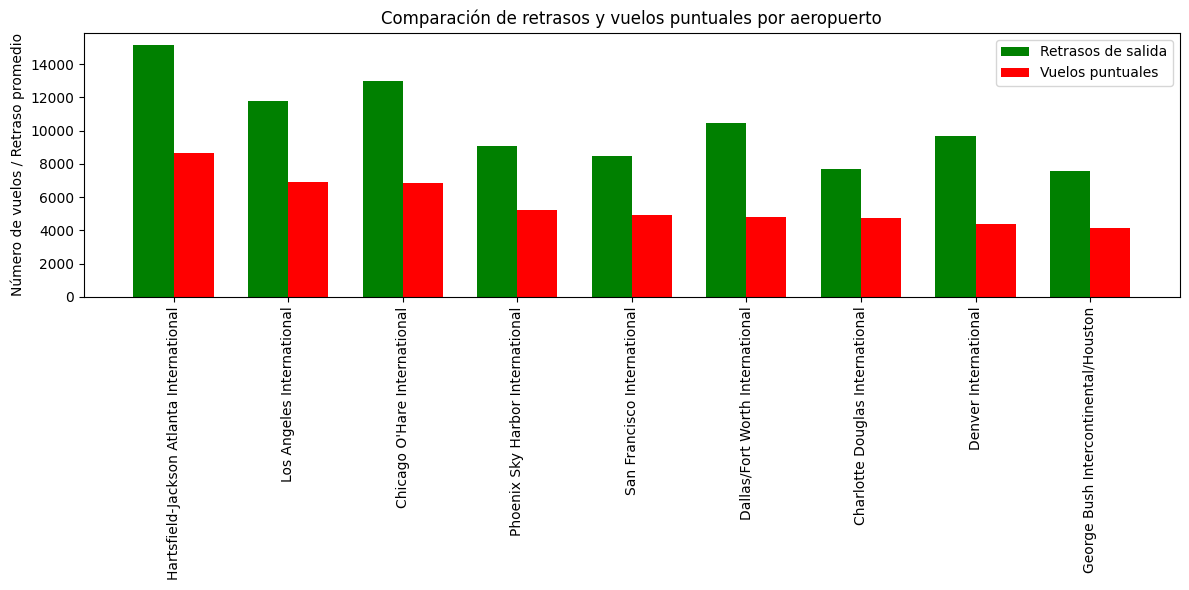

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener los nombres de aeropuertos que coinciden en ambas series
aeropuertos_comunes = Puntual_salida_aeropuerto.index.intersection(retraso_salida_tardia_aeropuerto.index)

# Filtrar los datos para que coincidan los aeropuertos en ambas series
Puntual_salida_aeropuerto_filtrada = Puntual_salida_aeropuerto[aeropuertos_comunes]
retraso_salida_tardia_aeropuerto_filtrada = retraso_salida_tardia_aeropuerto[aeropuertos_comunes]

# Mostrar los datos que serán graficados
print("Retrasos de salida por aeropuerto:\n", retraso_salida_tardia_aeropuerto_filtrada)
print("Vuelos puntuales por aeropuerto:\n", Puntual_salida_aeropuerto_filtrada)

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Definir el ancho de las barras
ancho_barra = 0.35  # Ancho de las barras

# Definir las posiciones de las barras
indices = np.arange(len(aeropuertos_comunes))

# Gráfico de barras para "Retrasos de salida"
plt.bar(indices, retraso_salida_tardia_aeropuerto_filtrada, width=ancho_barra, color='green', label='Retrasos de salida')

# Gráfico de barras para "Vuelos puntuales", desplazado a la derecha
plt.bar(indices + ancho_barra, Puntual_salida_aeropuerto_filtrada, width=ancho_barra, color='red', label='Vuelos puntuales')

# Título y etiquetas
plt.title('Comparación de retrasos y vuelos puntuales por aeropuerto')
plt.ylabel('Número de vuelos / Retraso promedio')

# Etiquetas del eje X (nombres de aeropuertos)
plt.xticks(indices + ancho_barra / 2, aeropuertos_comunes, rotation=90)

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Retraso de llegada por aeropuerto:
 OriginAirportName
Chicago O'Hare International                            12.084150
Chicago Midway International                            11.566929
Denver International                                    10.617045
Dallas/Fort Worth International                         10.311069
Palm Beach International                                 9.307393
William P Hobby                                          9.011584
Baltimore/Washington International Thurgood Marshall     8.818513
San Francisco International                              8.600284
Dallas Love Field                                        8.582866
Luis Munoz Marin International                           8.562321
Name: ArrDelay, dtype: float64


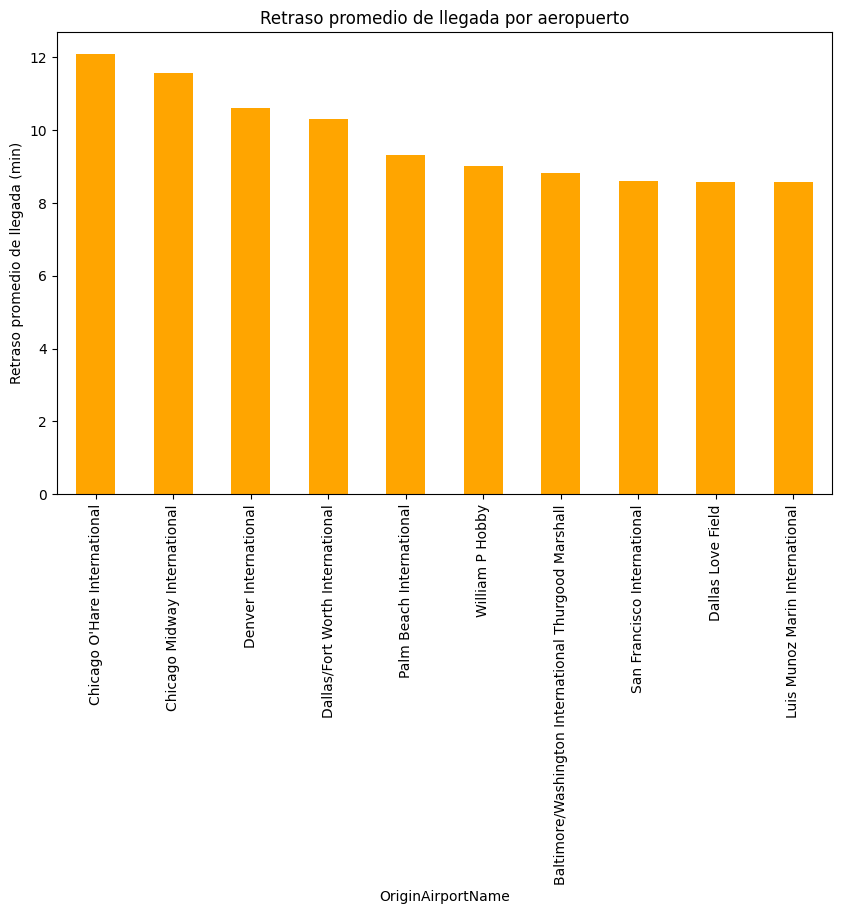

Retraso de salida por aeropuerto:
 OriginAirportName
Chicago O'Hare International                            16.264636
Chicago Midway International                            16.005451
Dallas/Fort Worth International                         14.169813
Newark Liberty International                            13.954367
John F. Kennedy International                           13.847152
Denver International                                    13.606818
San Francisco International                             13.395456
Baltimore/Washington International Thurgood Marshall    12.962821
William P Hobby                                         12.757751
Palm Beach International                                12.000973
Name: DepDelay, dtype: float64


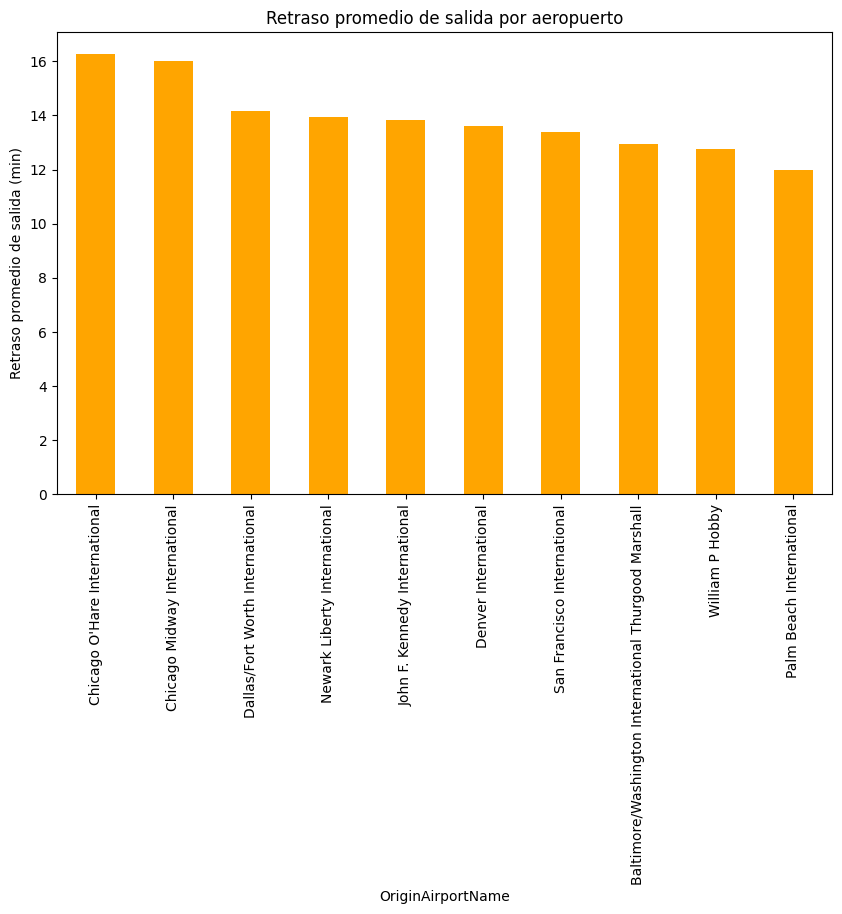

In [14]:
# 1. Gráfico de barras - Retraso promedio de llegada por aerolínea
print("Retraso de llegada por aeropuerto:\n", retraso_llegada_aeropuerto)
plt.figure(figsize=(10, 6))
retraso_llegada_aeropuerto.plot(kind='bar', color='orange')
plt.title('Retraso promedio de llegada por aeropuerto')
plt.ylabel('Retraso promedio de llegada (min)')
plt.xticks(rotation=90)
plt.show()

# 1. Gráfico de barras - Retraso promedio de llegada por aerolínea
print("Retraso de salida por aeropuerto:\n", retraso_salida_aeropuerto)
plt.figure(figsize=(10, 6))
retraso_salida_aeropuerto.plot(kind='bar', color='blue')
plt.title('Retraso promedio de salida por aeropuerto')
plt.ylabel('Retraso promedio de salida (min)')
plt.xticks(rotation=90)
plt.show()

Retraso de llegada por aerolinea:
 Carrier
MQ    12.605611
F9    11.460147
EV    10.074347
B6     9.841757
VX     9.453929
WN     8.062512
YV     7.758739
FL     7.611958
AA     6.719252
OO     6.006984
9E     5.100463
UA     4.847762
US     4.011702
DL     2.183680
HA     0.066098
AS    -0.129657
Name: ArrDelay, dtype: float64


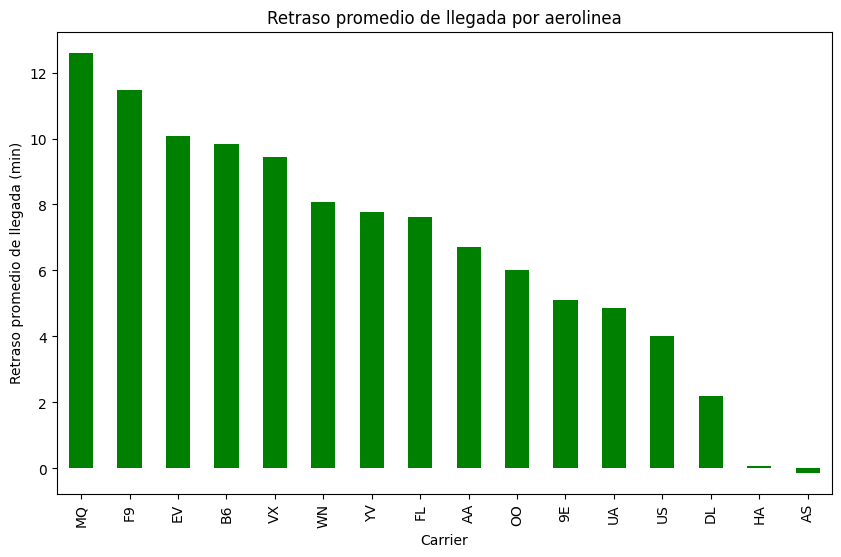

In [16]:
# 1. Gráfico de barras - Retraso promedio de llegada por aerolínea
print("Retraso de llegada por aerolinea:\n", retraso_llegada_aerolinea)
plt.figure(figsize=(10, 6))
retraso_llegada_aerolinea.plot(kind='bar', color='green')
plt.title('Retraso promedio de llegada por aerolinea')
plt.ylabel('Retraso promedio de llegada (min)')
plt.xticks(rotation=90)
plt.show()

Retraso de llegada por día de la semana:
 DayOfWeek
6     2.028329
2     4.178987
7     4.905797
1     6.622064
3     6.846158
5     8.315198
4    10.565032
Name: ArrDelay, dtype: float64


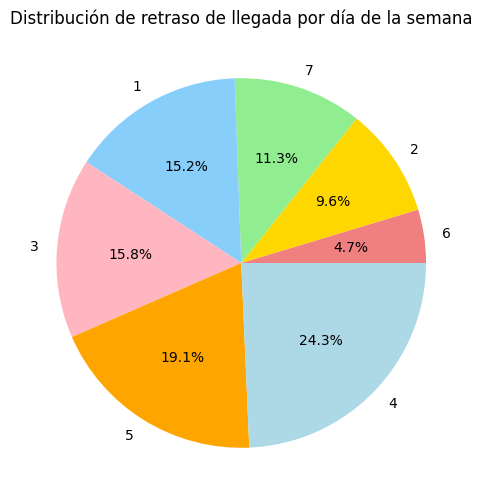

In [6]:
# 2. Gráfico circular - Retraso promedio de llegada por día de la semana
print("Retraso de llegada por día de la semana:\n", retraso_llegada_dia_semana)
plt.figure(figsize=(6, 6))
retraso_llegada_dia_semana.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'gold', 'lightgreen', 'lightskyblue', 'lightpink', 'orange', 'lightblue'])
plt.title('Distribución de retraso de llegada por día de la semana')
plt.ylabel('')
plt.show()

In [26]:
df_vuelos['Ruta'] = df_vuelos['OriginAirportName'] + ' -> ' + df_vuelos['DestAirportName']
rutas_con_mas_llegadas_tarde = df_vuelos[df_vuelos['ArrDel15'] == 1].groupby('Ruta')['ArrDel15'].count().sort_values(ascending=False)

print("Ruta con más llegadas tarde:\n", rutas_con_mas_llegadas_tarde.head(1))


Ruta con más llegadas tarde:
 Ruta
Los Angeles International -> San Francisco International    324
Name: ArrDel15, dtype: int64


In [14]:
# Crear una nueva columna que combine el aeropuerto de origen y destino como "ruta"
df_vuelos['Ruta'] = df_vuelos['OriginAirportName'] + ' -> ' + df_vuelos['DestAirportName']

# Agrupar por la nueva columna 'Ruta' y contar las salidas tardías (DepDel15 = 1)
rutas_con_mas_tardias = df_vuelos[df_vuelos['DepDel15'] == 1].groupby('Ruta')['DepDel15'].mean().sort_values(ascending=False)

# Mostrar la ruta con más salidas tardías
print("Ruta con más salidas tardías:\n", rutas_con_mas_tardias.head(1))


Ruta con más salidas tardías:
 Ruta
William P Hobby -> Will Rogers World    1.0
Name: DepDel15, dtype: float64
